In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import statsmodels.api as sm

In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

<AxesSubplot:ylabel='MEDV'>

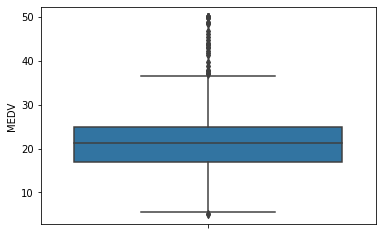

In [3]:
#For the "Median value of owner-occupied homes" provide a boxplot
ax=sns.boxplot(y="MEDV", data= boston_df)
ax


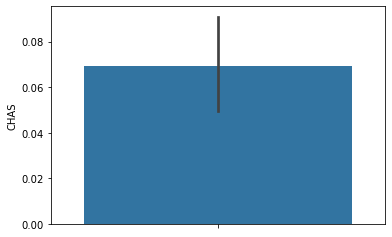

In [4]:
#Provide a  bar plot for the Charles river variable
ax=sns.barplot(y="CHAS", data= boston_df)

In [5]:
#Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
boston_df.loc[(boston_df["AGE"]<=35),"Age_Variable"]="35 years and younger"
boston_df.loc[(boston_df["AGE"]>35)&(boston_df["AGE"]<70),"Age_Variable"]="between 35 and 70 years"
boston_df.loc[(boston_df["AGE"]>=70),"Age_Variable"]="70 years and older"



              

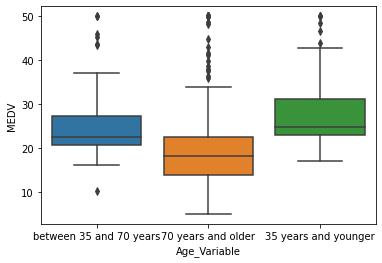

In [6]:
ax=sns.boxplot(x="Age_Variable",y="MEDV",data=boston_df)

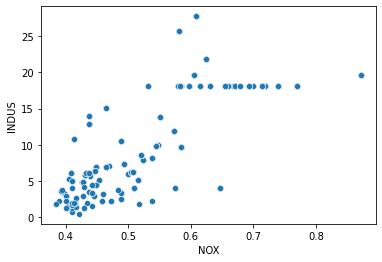

In [7]:
#Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?
ax=sns.scatterplot(x="NOX", y="INDUS", data=boston_df)


(array([ 15.,   2.,  58.,  15.,  35.,  69.,  76.,  40., 178.,  18.]),
 array([12.6 , 13.54, 14.48, 15.42, 16.36, 17.3 , 18.24, 19.18, 20.12,
        21.06, 22.  ]),
 <BarContainer object of 10 artists>)

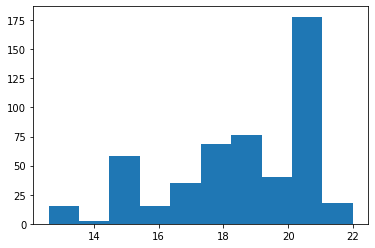

In [8]:
#Create a histogram for the pupil to teacher ratio variable
plt.hist(boston_df["PTRATIO"])

In [9]:
#Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
#N0=there is no significantly differences in median value of houses bounded by the Charles river
scipy.stats.ttest_ind(boston_df[boston_df.CHAS == 1].MEDV,
                     boston_df[boston_df.CHAS == 0].MEDV)
#we reject the null hypothesis

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

In [10]:
#Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
#N0=There is no significantly differences in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940.
boston_df.loc[(boston_df["AGE"]<=82),"Age_Variable"]="82 years and younger"
boston_df.loc[(boston_df["AGE"]>82),"Age_Variable"]="82 years and older"
scipy.stats.levene(boston_df[boston_df["Age_Variable"]=="82 years and younger"]["MEDV"],
                  boston_df[boston_df["Age_Variable"]=="82 years and older"]["MEDV"],center="mean")
#we fail to reject hypothesis.


LeveneResult(statistic=1.581350317246268, pvalue=0.2091486621949195)

In [11]:
#Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town
#N0=There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town
scipy.stats.pearsonr(boston_df["NOX"],boston_df["INDUS"])
#WE reject the null hypothesis. There is strong correlation

(0.7636514469209151, 7.913361061238693e-98)

In [13]:
#What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)
#N0=There is no impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes
x=boston_df["DIS"]
y=boston_df["MEDV"]
x= sm.add_constant(x)
model=sm.OLS(y,x).fit()
predictions=model.predict(x)
model.summary()
#Reject the null hypothesis.

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 25 Jul 2022   Prob (F-statistic):           1.21e-08
Time:                        15:18:27   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""